In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
Iris=pd.read_csv("Iris.csv")

In [4]:
df=Iris.copy()

In [5]:
df[""]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
df1=df.drop("Species",axis=1)

In [7]:
df2=df1.drop("Id",axis=1)

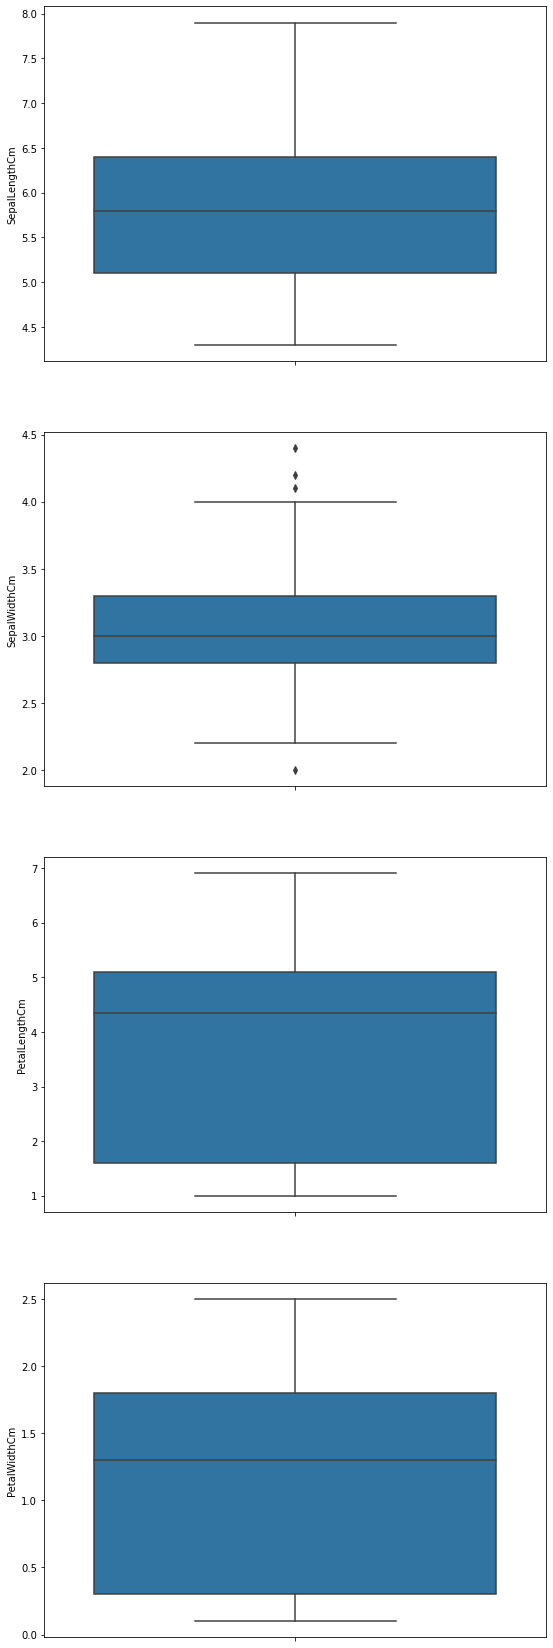

In [8]:
column_names=df2.columns
fig,axes = plt.subplots(nrows=len(column_names),figsize=(9,30))
for i in range(len(column_names)):
    sns.boxplot(ax=axes[i],y=column_names[i],data=df2)

In [9]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3=np.percentile(datacolumn,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [10]:
for i in column_names:
    lowerbound,upperbound=outlier_treatment(df2[i])
    df2[i]=np.clip(df2[i],a_min=lowerbound,a_max=upperbound)

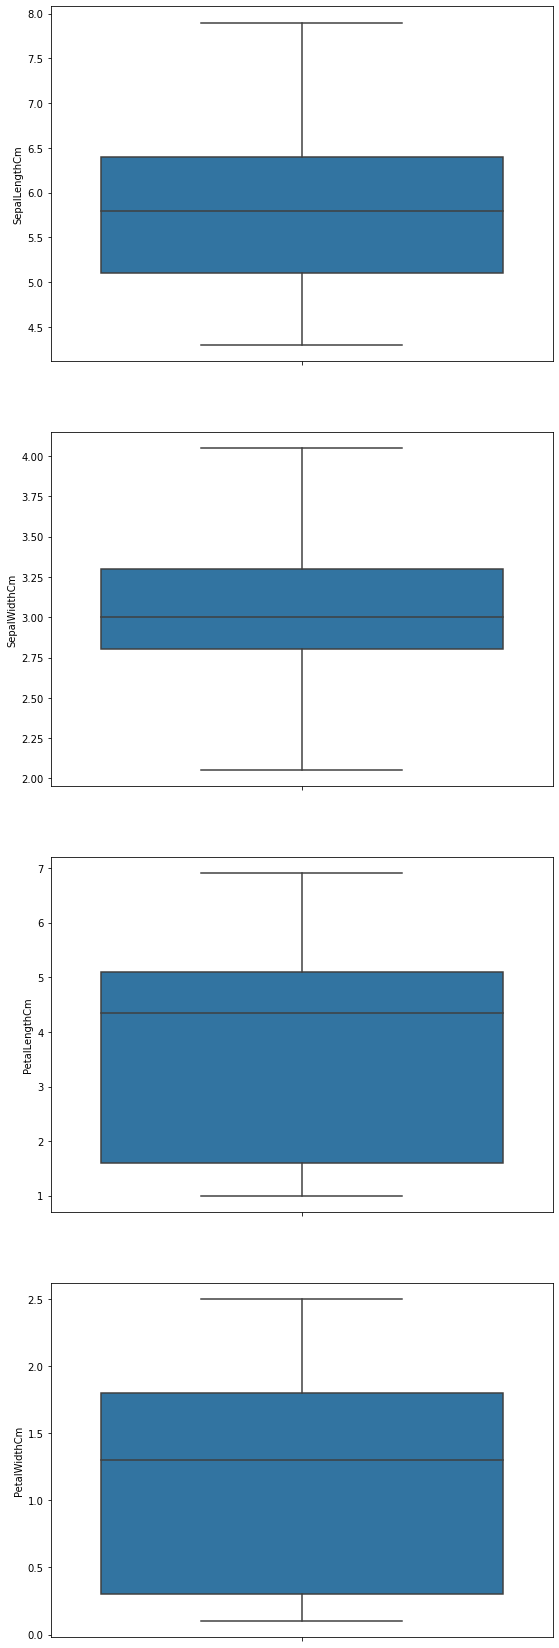

In [11]:
column_names=df2.columns
fig,axes = plt.subplots(nrows=len(column_names),figsize=(9,30))
for i in range(len(column_names)):
    sns.boxplot(ax=axes[i],y=column_names[i],data=df2)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [14]:
df2.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [15]:
df3=pd.DataFrame(scaler.fit_transform(df2),columns=column_names)

In [16]:
df3

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.065722,-1.341272,-1.312977
1,-1.143017,-0.120170,-1.341272,-1.312977
2,-1.385353,0.354187,-1.398138,-1.312977
3,-1.506521,0.117008,-1.284407,-1.312977
4,-1.021849,1.302901,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.120170,0.819624,1.447956
146,0.553333,-1.306063,0.705893,0.922064
147,0.795669,-0.120170,0.819624,1.053537
148,0.432165,0.828544,0.933356,1.447956


# KNN

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

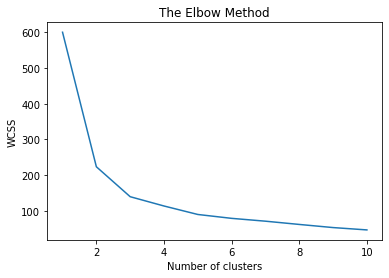

In [18]:
wcss = [] #within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df3)
    wcss.append(kmeans.inertia_)
    
    
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=42).fit(df3)

In [20]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [22]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [23]:
df["Kmeans"]=kmeans.labels_

In [24]:
#iris setosa 1
# iris virginica 0
#iris versicolor 2

In [25]:
df["Species"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

silhouette_score

In [26]:
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(df3)
    silhouette_avg = silhouette_score(df3, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.5798857604435109
For n_clusters = 3 The average silhouette_score is : 0.4609853948682445
For n_clusters = 4 The average silhouette_score is : 0.4209094249343606
For n_clusters = 5 The average silhouette_score is : 0.3565431238037356
For n_clusters = 6 The average silhouette_score is : 0.3351442247228347
For n_clusters = 7 The average silhouette_score is : 0.34284766677122397
For n_clusters = 8 The average silhouette_score is : 0.3630702549860579
For n_clusters = 9 The average silhouette_score is : 0.3572158860602096
For n_clusters = 10 The average silhouette_score is : 0.367071784653206


In [27]:
df3

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.065722,-1.341272,-1.312977
1,-1.143017,-0.120170,-1.341272,-1.312977
2,-1.385353,0.354187,-1.398138,-1.312977
3,-1.506521,0.117008,-1.284407,-1.312977
4,-1.021849,1.302901,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.120170,0.819624,1.447956
146,0.553333,-1.306063,0.705893,0.922064
147,0.795669,-0.120170,0.819624,1.053537
148,0.432165,0.828544,0.933356,1.447956


In [28]:
km

NameError: name 'km' is not defined

In [29]:
k=KMeans(n_clusters=3,init="k-means++",random_state=42)

In [30]:
a=k.fit_predict(df3)

In [37]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Kmeans
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0


In [36]:
X[a==0,0]

array([1.40150837, 0.67450115, 1.2803405 , 0.55333328, 1.03800476,
       0.06866179, 0.91683689, 1.15917263, 1.03800476, 0.18982966,
       1.03800476, 0.55333328, 1.52267624, 0.55333328, 0.79566902,
       2.12851559, 1.76501198, 1.03800476, 1.64384411, 0.79566902,
       0.67450115, 1.15917263, 0.67450115, 0.79566902, 2.24968346,
       2.24968346, 1.2803405 , 2.24968346, 1.03800476, 1.64384411,
       0.31099753, 0.67450115, 1.64384411, 1.88617985, 2.4920192 ,
       0.67450115, 2.24968346, 0.55333328, 0.67450115, 1.2803405 ,
       1.03800476, 1.2803405 , 1.15917263, 1.03800476, 1.03800476,
       0.79566902, 0.4321654 ])

In [31]:
X=df3.values

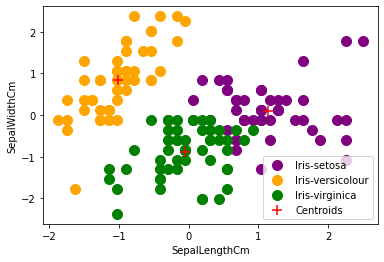

In [41]:
plt.scatter(x=X[a == 0, 0], y=X[a== 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x=X[a == 1, 0], y=X[a == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x=X[a == 2, 0], y=X[a == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids',marker = "+")
plt.xlabel("SepalLengthCm") 
plt.ylabel("SepalWidthCm")
plt.legend()
plt.show()

# Hierarchical

In [42]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

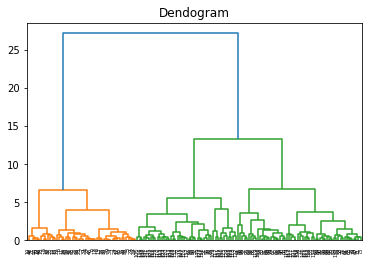

In [43]:
dendogram=sch.dendrogram(sch.linkage(df3,method='ward')) # Within cluster variance is reduced with ward method
plt.title('Dendogram')
plt.show()

In [44]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(df3)

In [45]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2], dtype=int64)

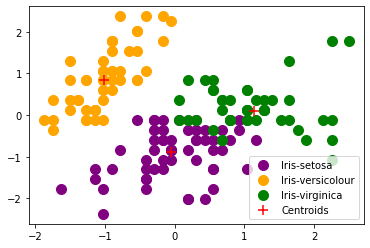

In [46]:
plt.scatter(X[y_hc == 0, 0], X[y_hc== 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids',marker = "+")

plt.legend()
plt.show()

In [47]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Kmeans
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0


In [48]:
df["y_hc"]=y_hc

In [49]:
df.loc[df["Kmeans"]==1,"Kmeansstr"]="Iris-setosa"
df.loc[df["Kmeans"]==0,"Kmeansstr"]="Iris-virginica"
df.loc[df["Kmeans"]==2,"Kmeansstr"]="Iris-versicolor"

In [50]:
df.loc[df["y_hc"]==1,"y_hcstr"]="Iris-setosa"
df.loc[df["y_hc"]==2,"y_hcstr"]="Iris-virginica"
df.loc[df["y_hc"]==0,"y_hcstr"]="Iris-versicolor"

In [51]:
#iris setosa 1
# iris virginica 0
#iris versicolor 2

In [52]:
df[df["Species"]==df["Kmeansstr"]]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Kmeans,y_hc,Kmeansstr,y_hcstr
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,1,Iris-setosa,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,1,Iris-setosa,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,1,Iris-setosa,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,1,Iris-setosa,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,1,Iris-setosa,Iris-setosa
...,...,...,...,...,...,...,...,...,...,...
143,144,6.8,3.2,5.9,2.3,Iris-virginica,0,2,Iris-virginica,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica,0,2,Iris-virginica,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0,2,Iris-virginica,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0,2,Iris-virginica,Iris-virginica


In [53]:
df[df["Species"]==df["y_hcstr"]]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Kmeans,y_hc,Kmeansstr,y_hcstr
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,1,Iris-setosa,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,1,Iris-setosa,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,1,Iris-setosa,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,1,Iris-setosa,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,1,Iris-setosa,Iris-setosa
...,...,...,...,...,...,...,...,...,...,...
144,145,6.7,3.3,5.7,2.5,Iris-virginica,0,2,Iris-virginica,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0,2,Iris-virginica,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0,2,Iris-virginica,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0,2,Iris-virginica,Iris-virginica
